In [44]:
import pandas as pd
import numpy as np

In [45]:
# Load the dataset into a dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final.csv')

In [46]:
# Check the description of the dataframe
print(df.describe())

       CUSTOMER_ORDER_ID     SALES_ORG  COMPANY_CODE  ORDER_CREATION_DATE  \
count       1.101925e+06  1.101925e+06  1.101925e+06         1.101925e+06   
mean        8.763187e+08  3.304891e+03  3.431364e+03         2.022032e+07   
std         7.088594e+07  6.958920e+02  5.483805e+02         1.426756e+02   
min         7.534520e+08  2.100000e+03  5.900000e+01         2.022010e+07   
25%         8.149522e+08  2.702000e+03  3.260000e+03         2.022021e+07   
50%         8.763963e+08  3.305000e+03  3.660000e+03         2.022032e+07   
75%         9.376832e+08  3.908000e+03  3.670000e+03         2.022042e+07   
max         9.990063e+08  4.510000e+03  4.260000e+03         2.022060e+07   

       ORDER_CREATION_TIME  SOLD_TO_PARTY  REQUESTED_DELIVERY_DATE  \
count         1.101925e+06   1.101925e+06             1.101925e+06   
mean          1.340316e+05   8.763265e+08             2.022035e+07   
std           6.503618e+04   7.090306e+07             1.751912e+03   
min           0.000000e+00

In [47]:
# Check the shape of the dataframe
print(df.shape)

(1101925, 16)


In [48]:
# Check the dataframe information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

In [49]:
# Check for null values in the dataframe
print(df.isnull().sum())

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64


In [50]:
# Replace all null values with "NaN"
df = df.replace(np.nan, "NaN")

In [51]:
# Change the format of date columns to datetime[64]
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'], format="%Y%m%d")
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'], format="%Y%m%d")

In [52]:
# Sanity check - Check how many records have order date greater than the delivery date
num_records_order_gt_delivery = len(df[df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']])
print("Number of records with order date greater than delivery date:", num_records_order_gt_delivery)

Number of records with order date greater than delivery date: 27142


In [53]:
# Remove records where the order date is greater than the delivery date
df = df[df['ORDER_CREATION_DATE'] <= df['REQUESTED_DELIVERY_DATE']]

In [54]:
# Count the number of records where the "ORDER_AMOUNT" field has "-"
num_records_amount_dash = len(df[df['ORDER_AMOUNT'] == "-"])
print("Number of records with '-' in ORDER_AMOUNT field:", num_records_amount_dash)

Number of records with '-' in ORDER_AMOUNT field: 0


In [55]:
# Replace "-" with "" in the "ORDER_AMOUNT" field
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].replace("-", "")

In [56]:
# Check the number of records where the "ORDER_AMOUNT" field has ","
num_records_amount_comma = len(df[df['ORDER_AMOUNT'].str.contains(",")])
print("Number of records with ',' in ORDER_AMOUNT field:", num_records_amount_comma)

Number of records with ',' in ORDER_AMOUNT field: 1073406


In [57]:
# Replace "," with "." in the "ORDER_AMOUNT" field
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace(",", ".")

In [58]:
# Count the number of records where the order date and delivery date are the same
num_records_same_dates = len(df[df['ORDER_CREATION_DATE'].dt.date == df['REQUESTED_DELIVERY_DATE'].dt.date])
print("Number of records with the same order date and delivery date:", num_records_same_dates)

Number of records with the same order date and delivery date: 100437


In [59]:
# Count the number of records for each currency type using the "ORDER_CURRENCY" field
currency_counts = df['ORDER_CURRENCY'].value_counts()
print(currency_counts)

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64


In [60]:
df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')
exchange_rates = {
    'USD': 1.0,
    'EUR': 1.08,
    'AUD': 0.65,
    'CAD': 0.74,
    'GBP': 1.24,
    'MYR': 0.22,
    'PLN': 0.24,
    'AED': 0.27,
    'HKD': 0.13,
    'CHF': 1.11,
    'RON': 0.22,
    'SGD': 0.74,
    'CZK': 0.045,
    'HU1': 0.0029,
    'NZD': 0.61,
    'BHD': 2.65,
    'SAR': 0.27,
    'QAR': 0.27,
    'KWD': 3.25,
    'SEK': 0.094
}

df['amount_in_usd'] = df.apply(lambda row: row['ORDER_AMOUNT'] / exchange_rates[row['ORDER_CURRENCY']] if row['ORDER_CURRENCY'] != 'USD' else row['ORDER_AMOUNT'], axis=1)
print(df)

         CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0                946851639       3537  United States of America  South-Region   
1                963432061       3449                Martinique  South-Region   
2                971991639       3238                   Moldova  South-Region   
3                754349803       3911      United Arab Emirates  South-Region   
4                930253442       2381                    Greece  South-Region   
...                    ...        ...                       ...           ...   
1101920          853605710       2498                   Germany  South-Region   
1101921          998890898       4509                   Armenia  South-Region   
1101922          983330221       3951                     Nepal  South-Region   
1101923          926668029       3235                    Panama  South-Region   
1101924          921701000       2968                 Nicaragua  South-Region   

        RELEASED_CREDIT_VAL

In [61]:
count_zero_amount = df[df["amount_in_usd"] == 0].shape[0]
print("Number of records with amount_in_usd equal to 0:", count_zero_amount)

Number of records with amount_in_usd equal to 0: 237821


In [62]:
values = df[df['amount_in_usd']==0]
len(values)

237821

In [63]:
df['unique_cust_id'] = df['CUSTOMER_NUMBER'] + df['COMPANY_CODE']

In [64]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/New_Final.csv', index=False)

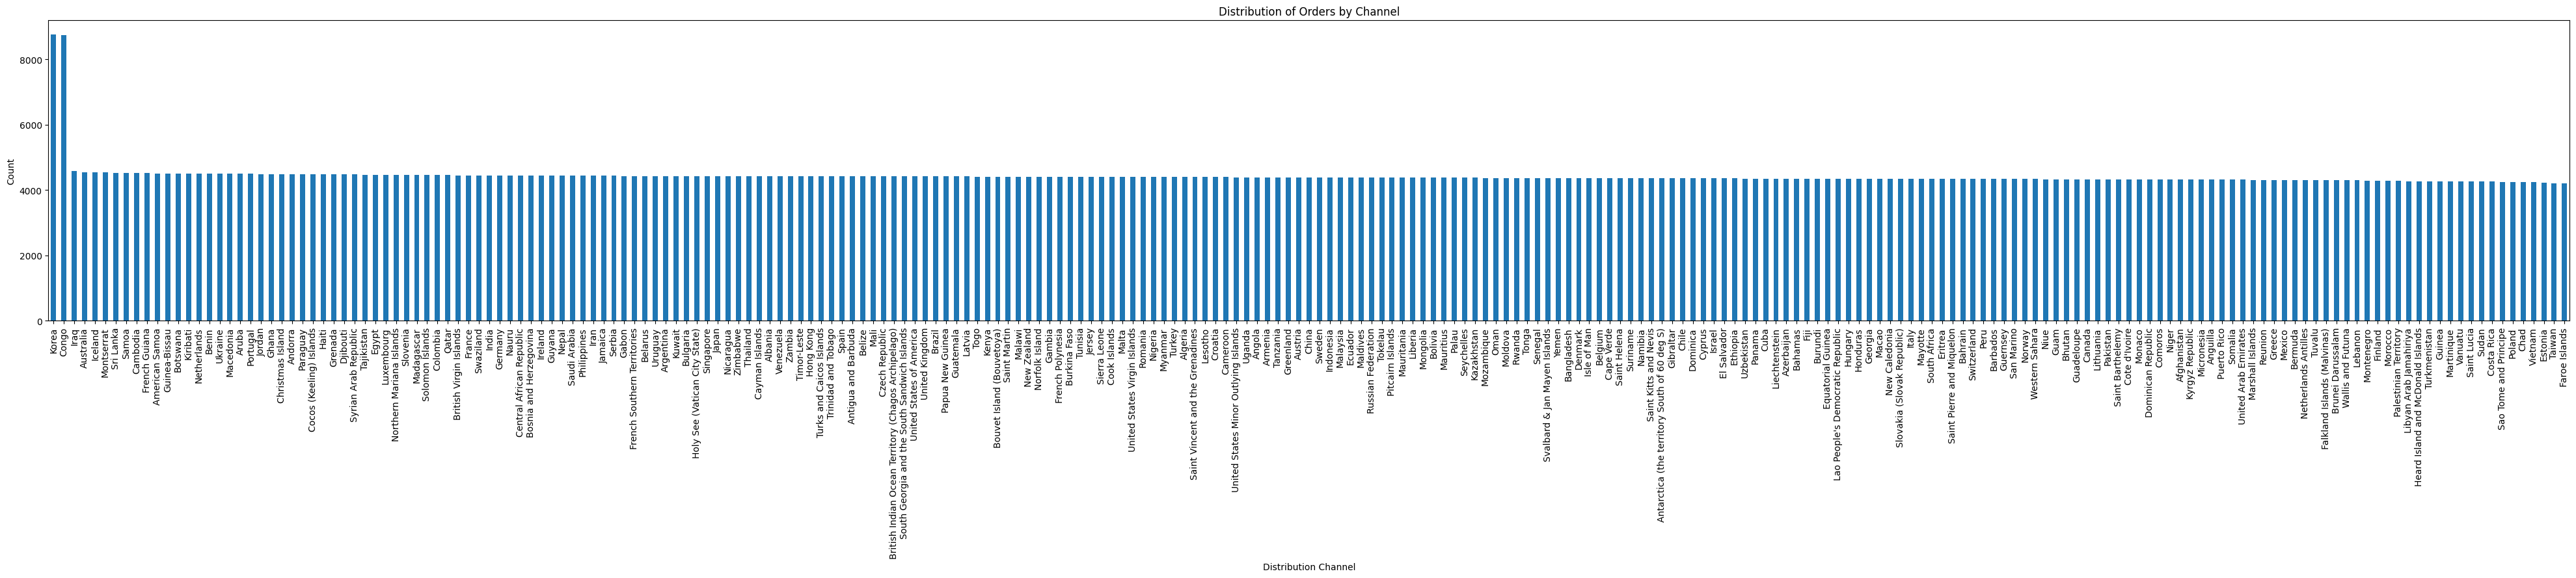

In [65]:
# Create a Histogram on DISTRIBUTION_CHANNEL
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(50,6))

df['DISTRIBUTION_CHANNEL'].value_counts().plot(kind='bar')

plt.xlabel('Distribution Channel')
plt.ylabel('Count')
plt.title('Distribution of Orders by Channel')

plt.show()

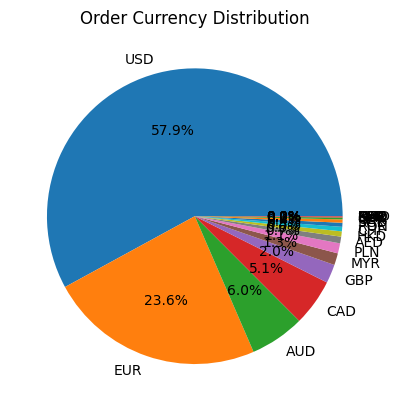

In [66]:
# Create a Pie Chart on ORDER_CURRENCY
order_currency_counts = df['ORDER_CURRENCY'].value_counts()

plt.pie(order_currency_counts, labels=order_currency_counts.index, autopct='%1.1f%%')

plt.title('Order Currency Distribution')

plt.show()


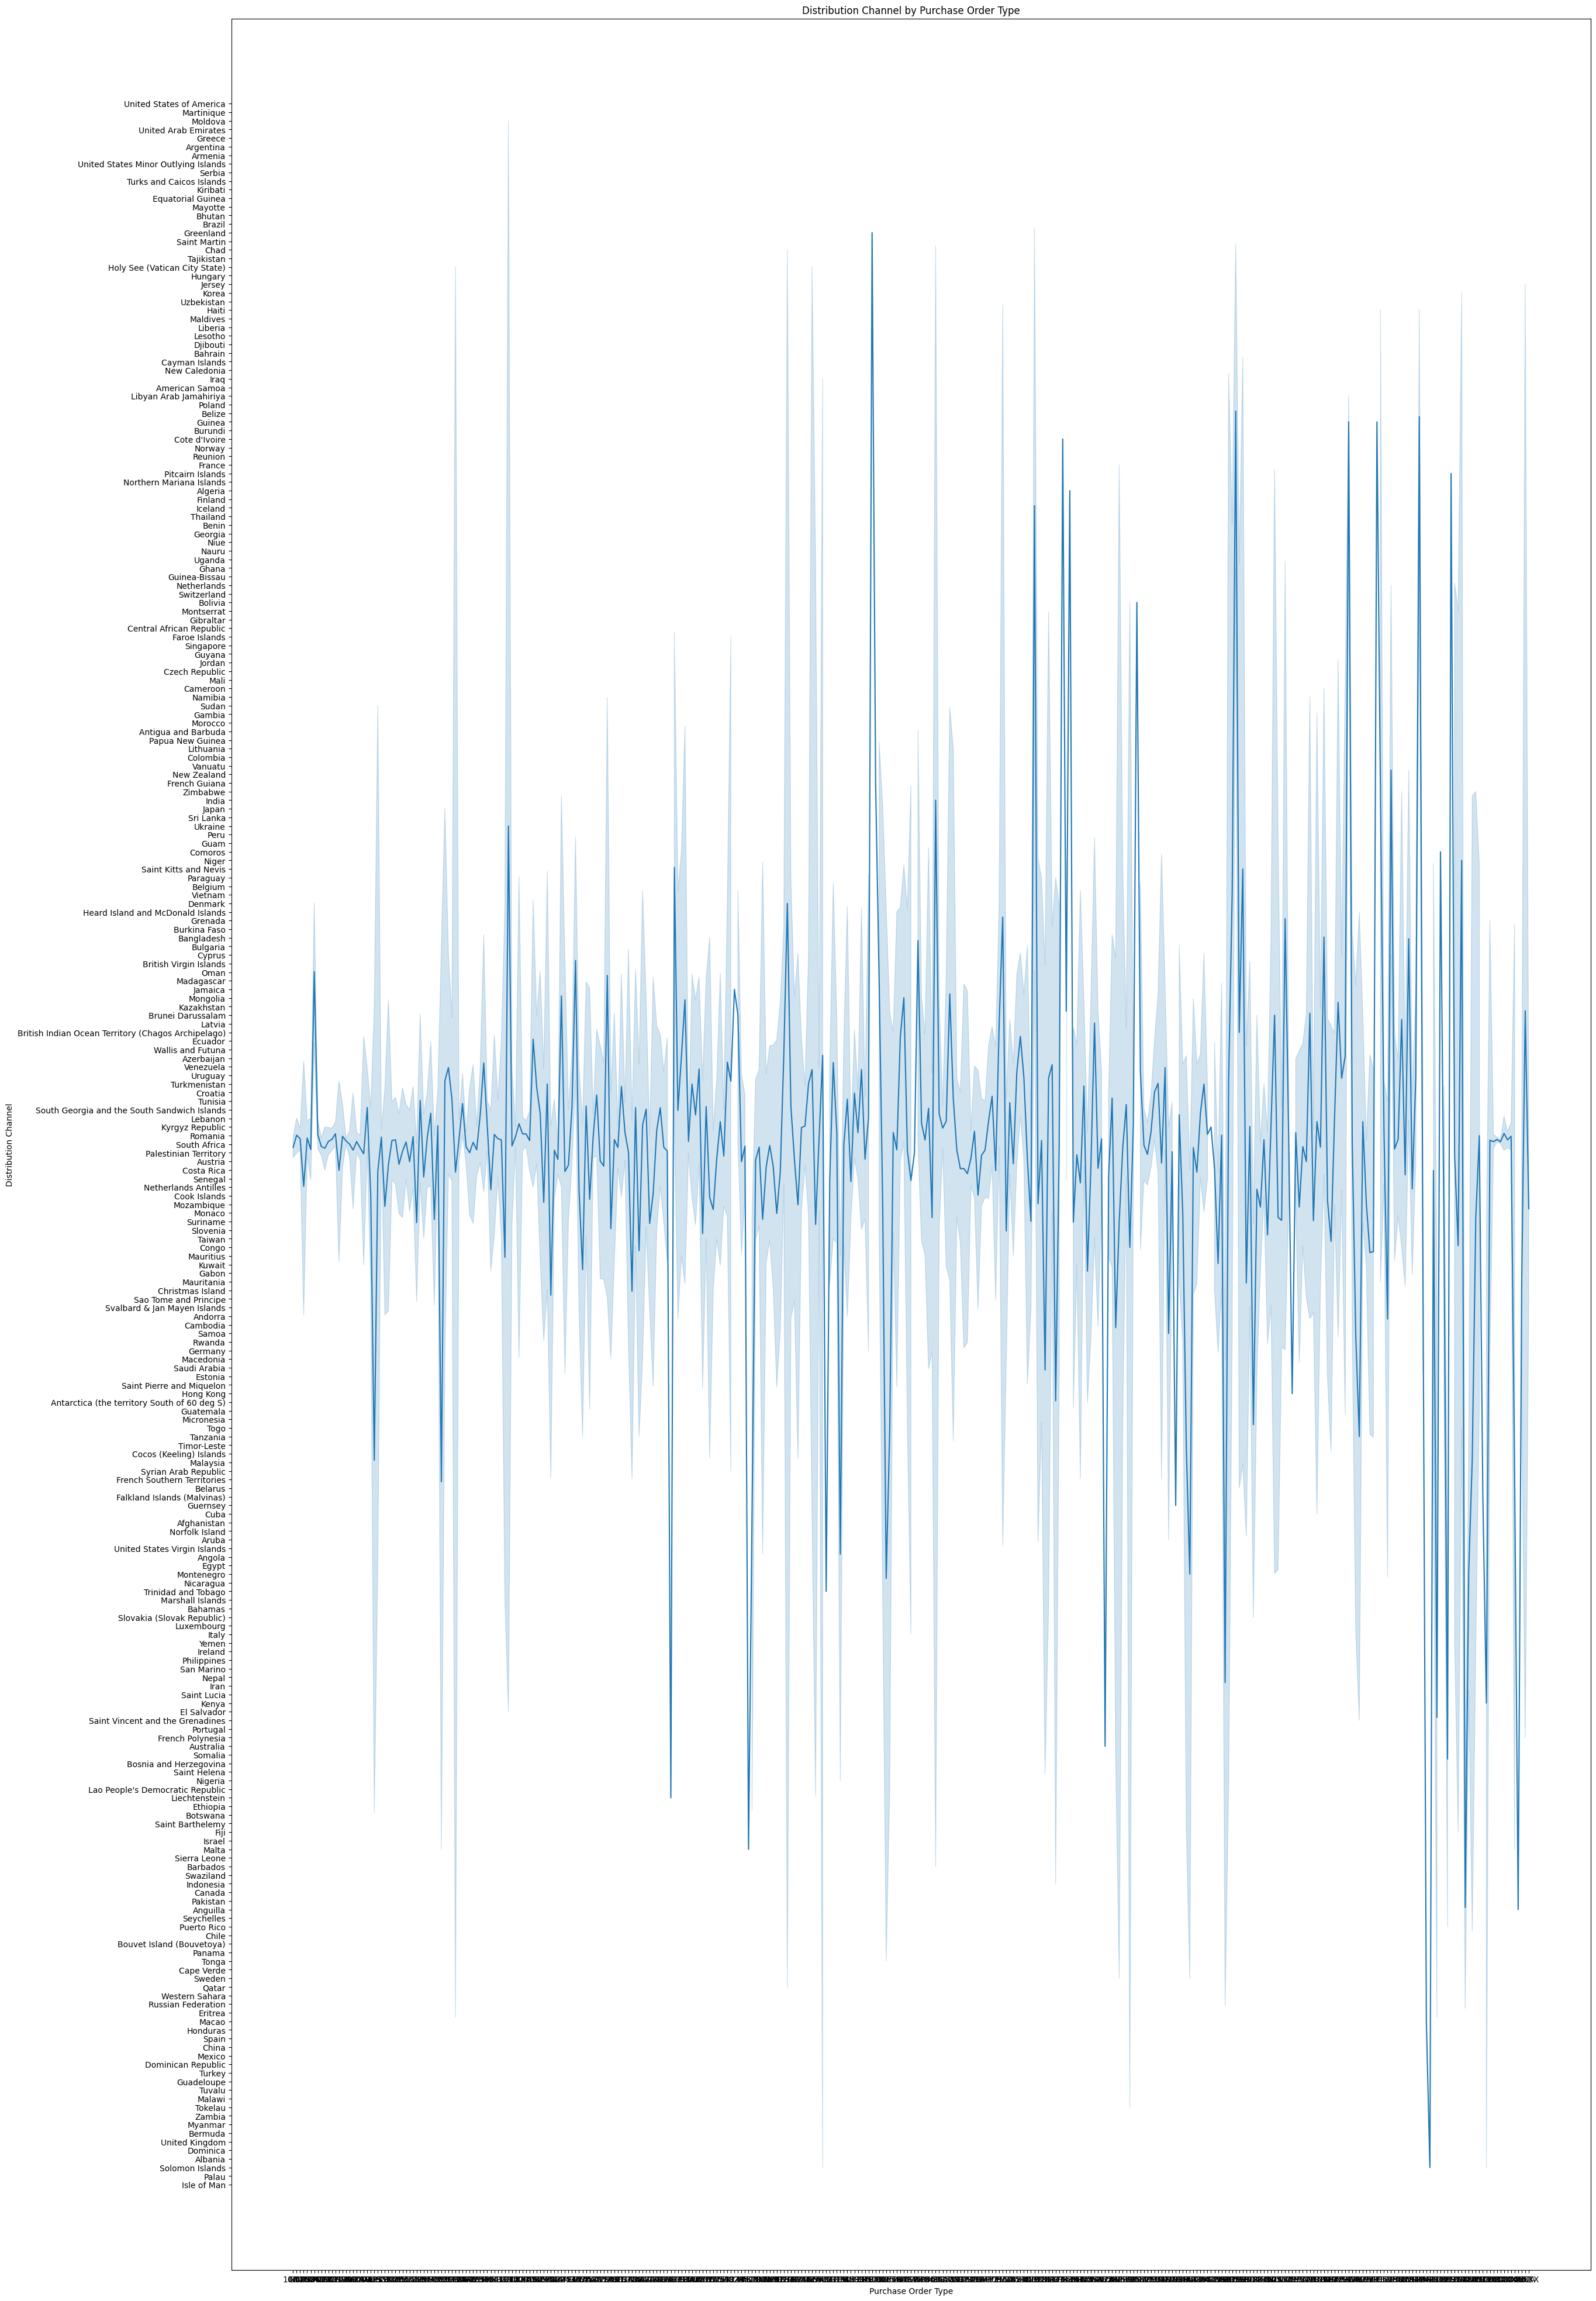

In [67]:
# Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL
import seaborn as sns

plt.figure(figsize=(30,50))

sns.lineplot(data=df, x='PURCHASE_ORDER_TYPE', y='DISTRIBUTION_CHANNEL')

plt.xlabel('Purchase Order Type')
plt.ylabel('Distribution Channel')
plt.title('Distribution Channel by Purchase Order Type')

plt.show()

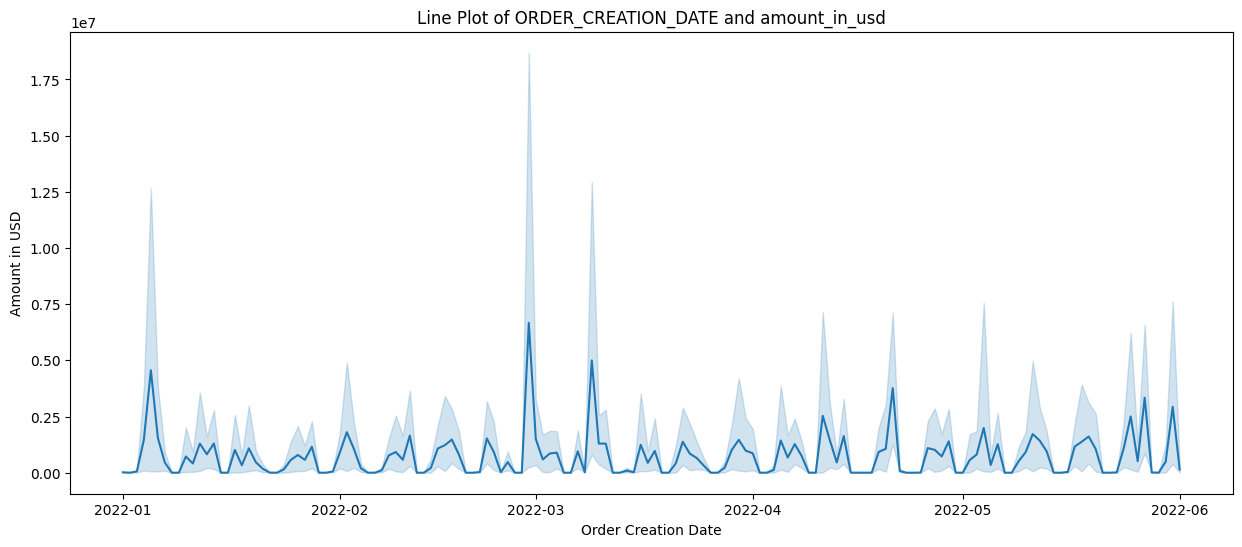

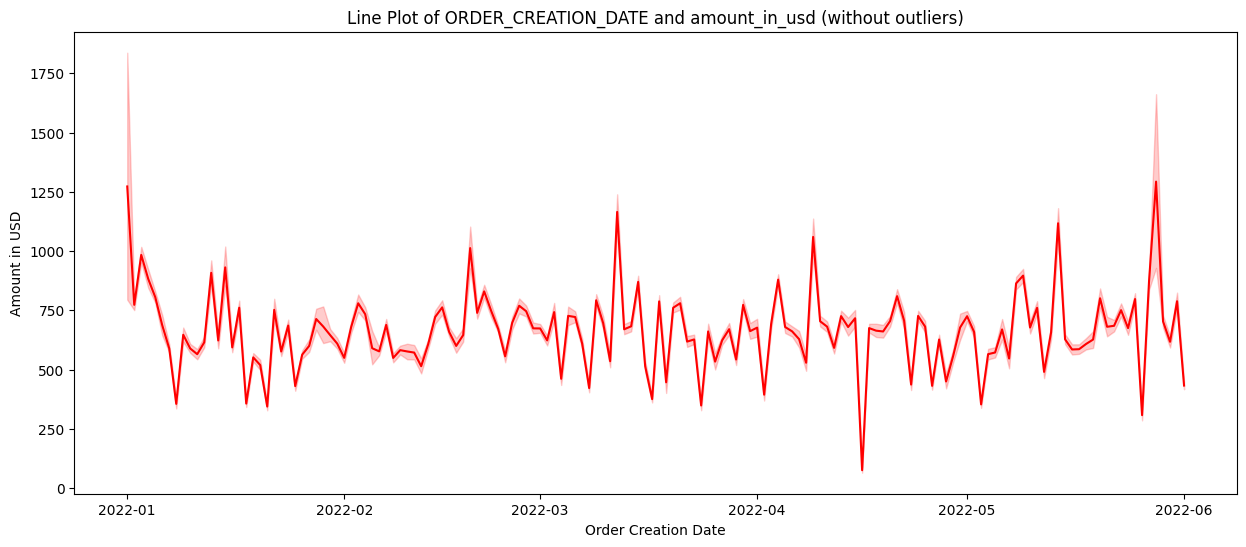

In [68]:
# Create a line plot on ORDER_CREATION_DATE and amount_in_usd
# fig = px.line(data_frame=df, x='ORDER_CREATION_DATE', y='amount_in_usd')
# fig.show()
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='ORDER_CREATION_DATE', y='amount_in_usd')
plt.xlabel('Order Creation Date')
plt.ylabel('Amount in USD')
plt.title('Line Plot of ORDER_CREATION_DATE and amount_in_usd')
plt.show()
threshold = df['amount_in_usd'].quantile(0.95)
filtered_df = df[df['amount_in_usd'] <= threshold]
plt.figure(figsize=(15, 6))
sns.lineplot(data=filtered_df, x='ORDER_CREATION_DATE', y='amount_in_usd', color='red')
plt.xlabel('Order Creation Date')
plt.ylabel('Amount in USD')
plt.title('Line Plot of ORDER_CREATION_DATE and amount_in_usd (without outliers)')
plt.show()

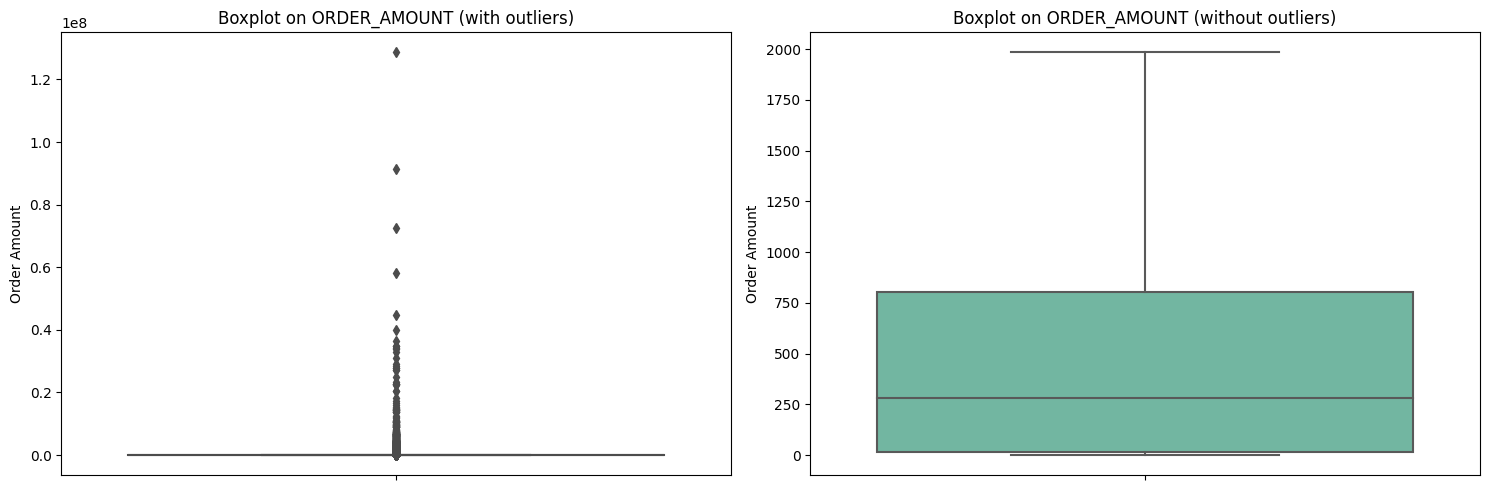

In [69]:
# Create a boxplot on ORDER_AMOUNT to find out the outliers

# fig = px.box(data_frame=df, y='ORDER_AMOUNT')
# fig.show()
# plt.figure(figsize=(5,5)) 
# sns.boxplot(data=df, y='ORDER_AMOUNT')
# plt.ylabel("Order Amount")
# plt.title('Boxplot on ORDER_AMOUNT ')
# plt.show()
# plt.figure(figsize=(5,5))
# sns.boxplot(data=df, y='ORDER_AMOUNT', showfliers=False)
# plt.ylabel('Order Amount')
# plt.title('Boxplot on ORDER_AMOUNT (without outliers)')
# plt.show()
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=df, y='ORDER_AMOUNT', ax=axes[0], palette='Set1')
axes[0].set_ylabel('Order Amount')
axes[0].set_title('Boxplot on ORDER_AMOUNT (with outliers)')
sns.boxplot(data=df, y='ORDER_AMOUNT', ax=axes[1], showfliers=False, palette='Set2')
axes[1].set_ylabel('Order Amount')
axes[1].set_title('Boxplot on ORDER_AMOUNT (without outliers)')
plt.tight_layout()
plt.show()

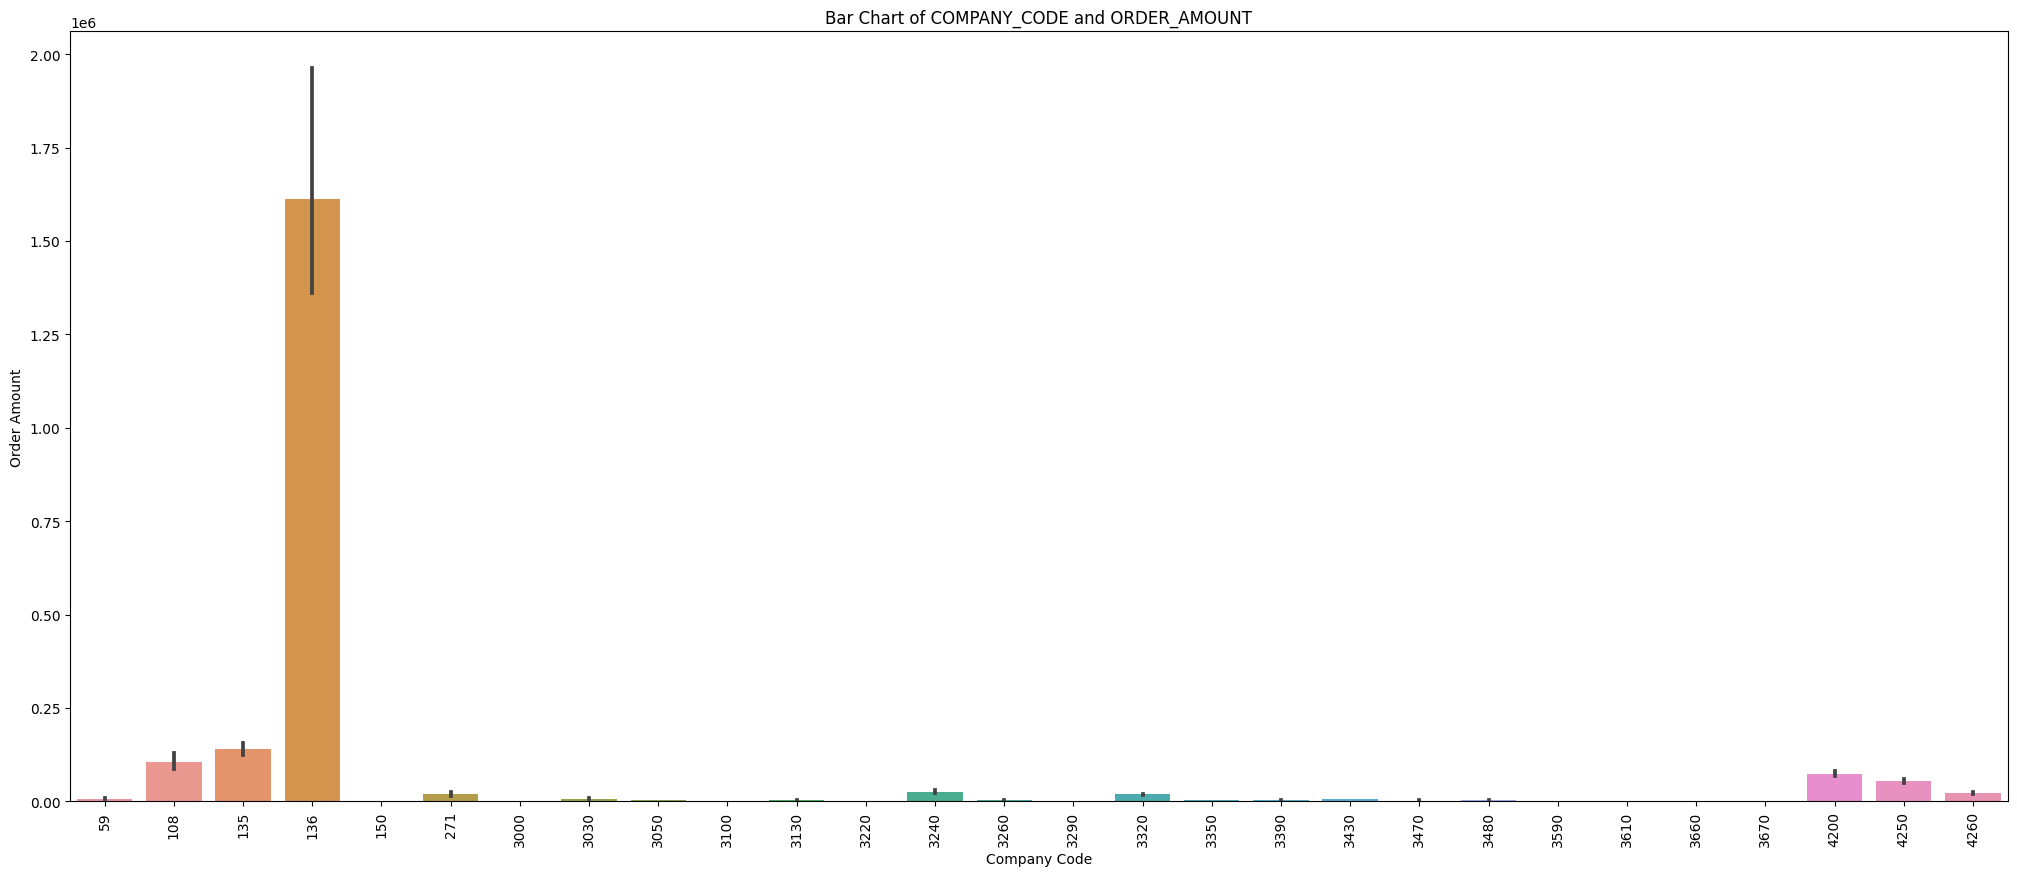

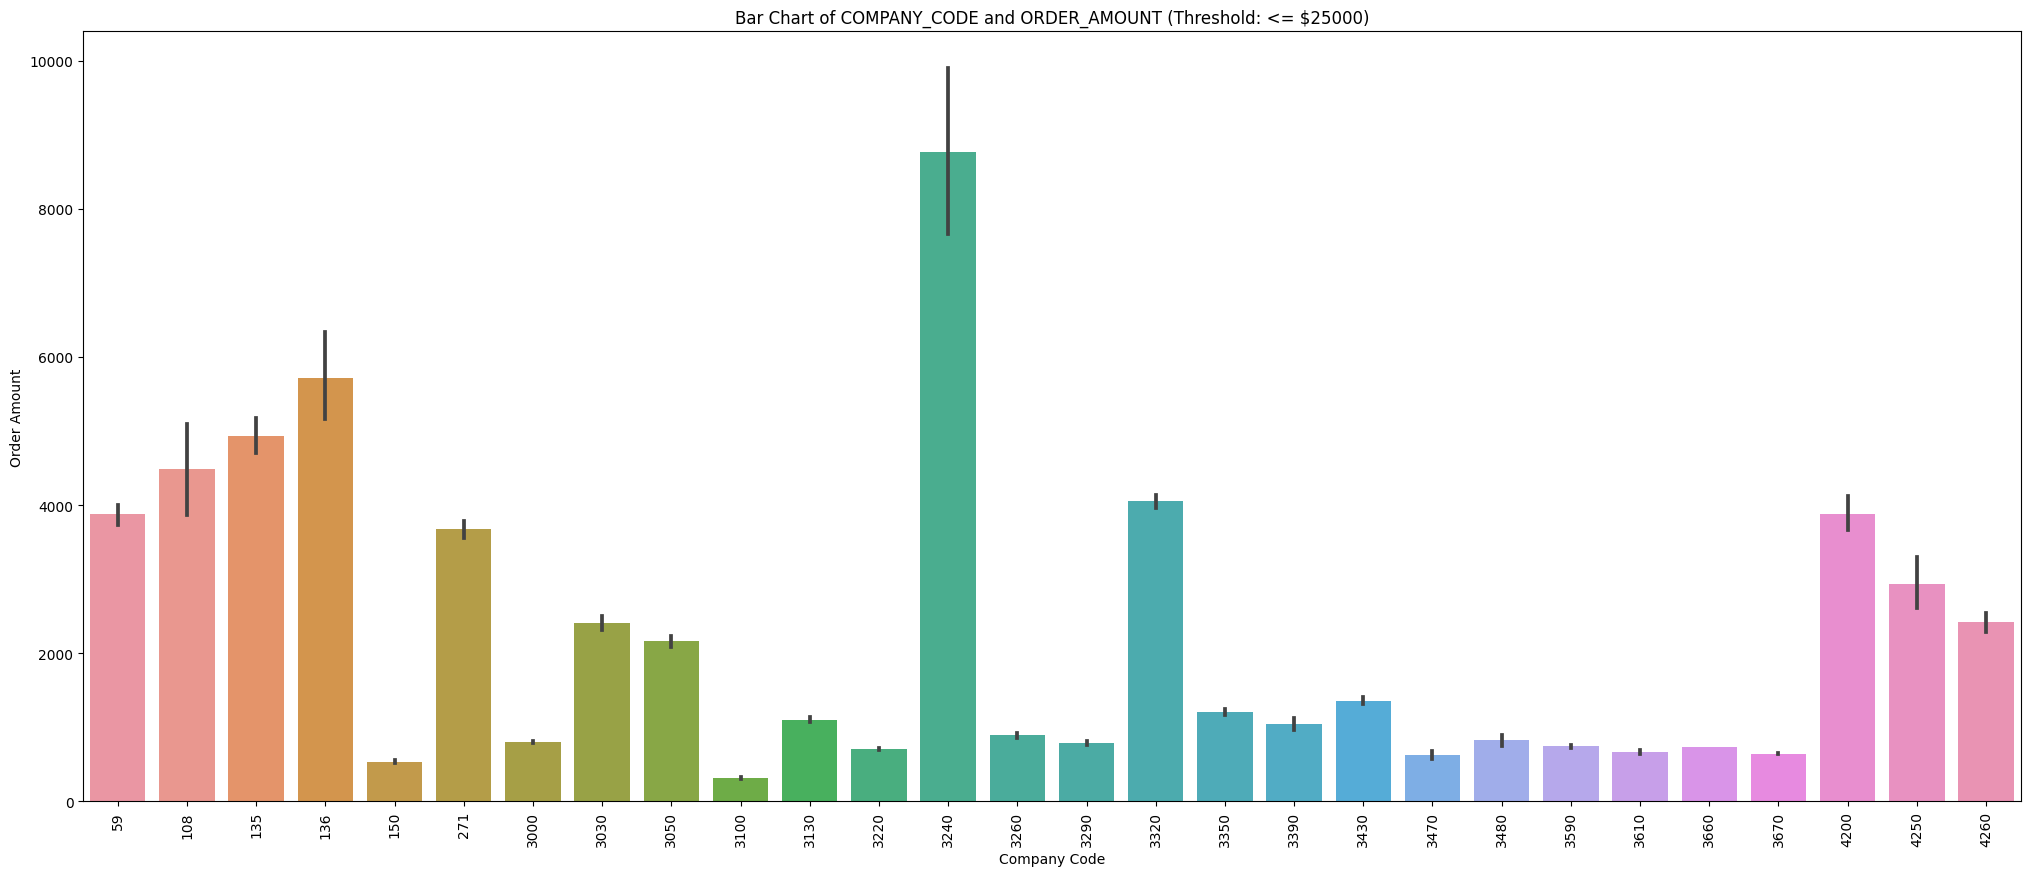

In [70]:
# Create a barchart on COMPANY_CODE	 and ORDER_AMOUNT

# fig = px.bar(data_frame=df, x='COMPANY_CODE', y='ORDER_AMOUNT')
# fig.show()
plt.figure(figsize=(25,10))
sns.barplot(data=df, x='COMPANY_CODE', y='ORDER_AMOUNT')
plt.xlabel('Company Code') 
plt.ylabel('Order Amount')
plt.title('Bar Chart of COMPANY_CODE and ORDER_AMOUNT')
plt.xticks(rotation='vertical')
plt.show()
plt.figure(figsize=(25,10))
filtered_df = df[df['ORDER_AMOUNT'] <= 25000]
sns.barplot(data=filtered_df, x='COMPANY_CODE', y='ORDER_AMOUNT')
plt.xlabel('Company Code')
plt.ylabel('Order Amount')
plt.title('Bar Chart of COMPANY_CODE and ORDER_AMOUNT (Threshold: <= $25000)')
plt.xticks(rotation='vertical')
plt.show()

### **Milestone 3**

In [71]:
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

1. Check for the outliers in the “amount_in_usd” column and replace the outliers with appropriate values, discussed in the sessions.

In [72]:
q1 = df['amount_in_usd'].quantile(0.25)
q3 = df['amount_in_usd'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
median_value = df['amount_in_usd'].median()
num_outlier=(df['amount_in_usd'] < lower_bound) | (df['amount_in_usd'] > upper_bound)
df['amount_in_usd'] = np.where(num_outlier,median_value,df['amount_in_usd'])
df.sample(5)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
413068,754911623,2795,Oman,North-Region,"0,00",X000,3660,2022-01-23,184823,SR01,968143673,437.12,2022-02-03,USD,NaN,1230014342,437.120000,1230018002
1020313,761952552,2479,Swaziland,North-Region,"0,00",9999,3000,2022-01-21,70330,NR04,898885438,283.20,2022-01-21,AUD,64.0,1210385607,435.692308,1210388607
897642,995457362,2300,Fiji,North-Region,"0,00",X000,3660,2022-05-08,183208,SR02,987003244,336.59,2022-05-19,USD,NaN,1230014342,336.590000,1230018002
371718,945483702,2454,Samoa,North-Region,"0,00",X000,3660,2022-01-17,100646,SR02,762948688,0.00,2022-02-22,USD,NaN,1230014329,0.000000,1230017989
449536,843072026,4260,Turkey,North-Region,"0,00",X000,3660,2022-01-31,200327,NR01,961255008,1190.58,2022-02-10,USD,NaN,1230014342,1190.580000,1230018002


2. Label encoding or One hot Encoding on all the categorical columns

In [73]:
label_encoder = LabelEncoder()
categorical_columns = ['DISTRIBUTION_CHANNEL', 'DIVISION', 'PURCHASE_ORDER_TYPE', 'CREDIT_CONTROL_AREA', 'ORDER_CURRENCY']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.sample(5)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
372445,762156387,4044,54,0,"0,00",343,3660,2022-01-17,123644,3,765100348,795.77,2022-01-18,19,NaN,1230014329,795.770000,1230017989
450187,948747653,3528,148,0,"0,00",343,3660,2022-01-31,201326,2,871187686,220.38,2022-02-10,19,NaN,1230014342,220.380000,1230018002
280033,923952115,2333,132,1,"0,00",255,3290,2022-05-17,53903,2,767974042,1146.51,2022-05-20,6,NaN,12132587,1061.583333,12135877
753738,995317867,4245,45,1,"0,00",344,3670,2022-04-04,150036,5,756624026,140.40,2022-04-11,19,NaN,1230024538,140.400000,1230028208
1008380,950359290,2230,114,1,"0,00",104,3030,2022-01-04,25648,5,856661223,0.00,2022-01-07,8,NaN,1210407253,0.000000,1210410283


3. Log Transformations on continuous columns 

In [74]:
continuous_columns = ['CUSTOMER_ORDER_ID', 'SALES_ORG', 'COMPANY_CODE', 'ORDER_CREATION_DATE', 
                      'ORDER_CREATION_TIME', 'SOLD_TO_PARTY', 'REQUESTED_DELIVERY_DATE', 
                      'CREDIT_STATUS', 'CUSTOMER_NUMBER']
df[continuous_columns] = df[continuous_columns].apply(pd.to_numeric, errors='coerce')
df[continuous_columns] = df[continuous_columns].replace(0, np.nan)
df[continuous_columns] = df[continuous_columns].mask(df[continuous_columns] < 0)
df[continuous_columns] = np.log(df[continuous_columns])
df.sample(5)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
222930,20.609973,8.112228,217,0,"159,03",104,8.107720,41.947243,11.776182,3,20.647844,51.78,41.948185,6,3.951244,20.930288,47.944444,1230012606
55926,20.666658,8.238273,0,1,"0,00",11,8.077137,41.943308,10.836340,0,20.711652,654.64,41.943938,6,NaN,16.326069,606.148148,12315027
1095745,20.720834,7.790282,80,0,"0,00",104,8.006368,41.949283,9.474933,2,20.453847,955.66,41.949649,1,4.158883,20.930290,1470.246154,1230014794
280017,20.616545,7.818430,137,1,"0,00",51,8.077137,41.948970,10.887755,6,20.575056,3724.05,41.949335,6,NaN,16.326069,297.360000,12315027
918553,20.708390,8.385032,59,1,"0,00",344,8.207947,41.948708,11.002633,4,20.452278,311.22,41.951111,19,NaN,20.930300,311.220000,1230028208


4. Try to extract new features by grouping existing columns 

In [75]:
# Example 1: Sum of ORDER_AMOUNT for each DISTRIBUTION_CHANNEL
grouped_df1 = df.groupby('DISTRIBUTION_CHANNEL')['ORDER_AMOUNT'].sum().reset_index()
grouped_df1.rename(columns={'ORDER_AMOUNT': 'TOTAL_ORDER_AMOUNT'}, inplace=True)

# Example 2: Count of unique CUSTOMER_NUMBER for each DIVISION
grouped_df2 = df.groupby('DIVISION')['CUSTOMER_NUMBER'].nunique().reset_index()
grouped_df2.rename(columns={'CUSTOMER_NUMBER': 'UNIQUE_CUSTOMERS'}, inplace=True)

# Example 3: Mean of CREDIT_STATUS for each SALES_ORG
grouped_df3 = df.groupby('SALES_ORG')['CREDIT_STATUS'].mean().reset_index()
grouped_df3.rename(columns={'CREDIT_STATUS': 'AVERAGE_CREDIT_STATUS'}, inplace=True)

# Merge the new features back into the original DataFrame
df = df.merge(grouped_df1, on='DISTRIBUTION_CHANNEL', how='left')
df = df.merge(grouped_df2, on='DIVISION', how='left')
df = df.merge(grouped_df3, on='SALES_ORG', how='left')

df.sample(5)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id,TOTAL_ORDER_AMOUNT,UNIQUE_CUSTOMERS,AVERAGE_CREDIT_STATUS
332234,20.452817,8.203578,121,1,"0,00",344,8.207947,41.942150,12.157082,6,...,1350.00,41.942519,19,NaN,20.930292,1350.000000,1230017871,5.355059e+07,3189,4.273416
318450,20.461866,7.770645,192,0,"0,00",343,8.205218,41.941993,12.130977,2,...,1052.54,41.942834,19,NaN,20.930292,1052.540000,1230018002,2.177281e+07,3532,4.287181
590153,20.675862,7.832014,130,0,"0,00",343,8.205218,41.944989,12.004629,5,...,282.66,41.945776,19,NaN,20.930292,282.660000,1230018002,2.124637e+07,3532,4.315289
583179,20.617918,7.843064,49,1,"0,00",155,8.185907,41.944936,11.850861,5,...,1327.20,41.945618,3,NaN,20.930282,1793.513514,1230006203,3.680123e+07,3189,4.278328
966685,20.570926,8.150179,187,0,"0,00",343,8.205218,41.949649,11.557067,7,...,2370.30,41.950171,19,NaN,20.930292,297.360000,1230017974,2.701493e+07,3532,4.258103


5. Create a heatmap to find correlation between the columns

<ipython-input-76-5795ca4514db>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


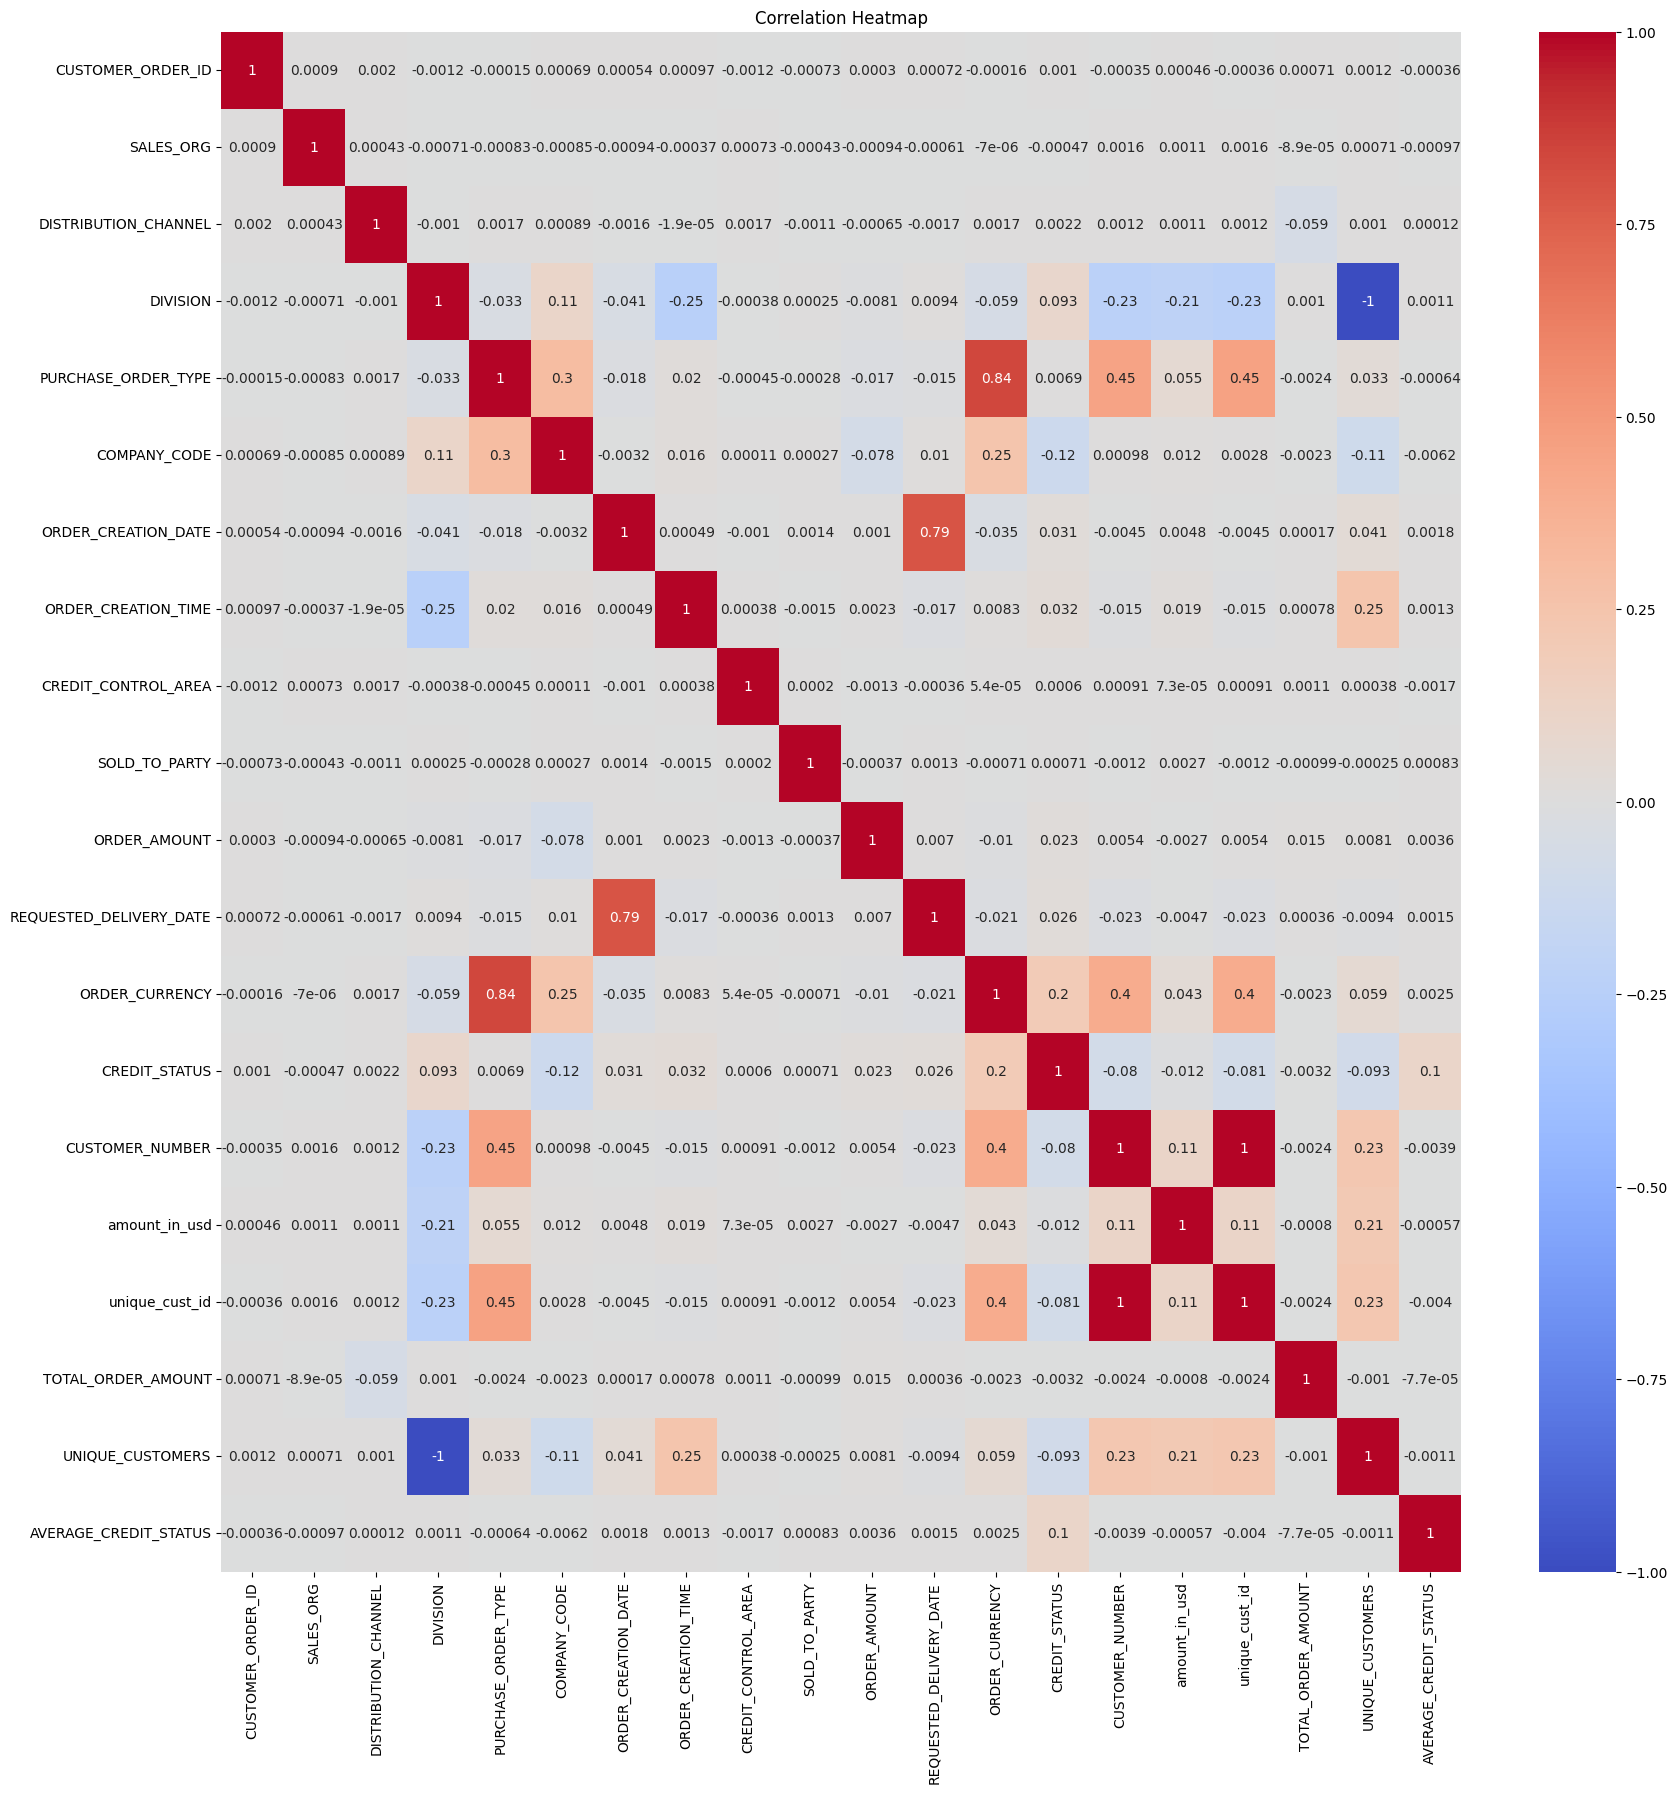

In [76]:
correlation_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

6. Try to identify important or relevant columns for feature extraction

In [77]:
corr_matrix = df.corr()
threshold = 0.5
relevant_columns = []
target_variable = 'REQUESTED_DELIVERY_DATE'  
for col in corr_matrix.columns:
    if abs(corr_matrix[target_variable][col]) >= threshold:
        relevant_columns.append(col)
print('Relevant columns for feature extraction:', relevant_columns)

<ipython-input-77-d751bd7ee04f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Relevant columns for feature extraction: ['ORDER_CREATION_DATE', 'REQUESTED_DELIVERY_DATE']


In [78]:
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'], format='%Y-%m-%d')
df['Day'] = df['ORDER_CREATION_DATE'].dt.day
df['Month'] = df['ORDER_CREATION_DATE'].dt.month
df['Year'] = df['ORDER_CREATION_DATE'].dt.year
df = df.sort_values('ORDER_CREATION_DATE')
df.sample(5)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id,TOTAL_ORDER_AMOUNT,UNIQUE_CUSTOMERS,AVERAGE_CREDIT_STATUS,Day,Month,Year
958977,20.678998,8.105308,162,0,"0,00",154,8.185907,1970-01-01 00:00:00.000000041,11.703819,0,...,NaN,20.930292,763.162162,1230017886,1.219343e+07,3532,4.289259,1,1,1970
204111,20.586525,7.724888,73,1,"0,00",255,8.098643,1970-01-01 00:00:00.000000041,11.857252,0,...,NaN,16.311417,0.000000,12136011,2.690725e+07,3189,4.282454,1,1,1970
1031638,20.628410,8.286773,71,0,"0,00",104,8.006368,1970-01-01 00:00:00.000000041,12.320856,3,...,4.158883,20.930290,1373.292308,1230014794,1.900478e+07,3532,4.308370,1,1,1970
278876,20.505217,7.851272,15,0,"0,00",105,8.039157,1970-01-01 00:00:00.000000041,12.225483,3,...,NaN,20.930297,65.638889,1230023445,1.576452e+07,3532,4.262693,1,1,1970
415053,20.639971,8.237744,13,0,"0,00",343,8.205218,1970-01-01 00:00:00.000000041,11.718662,7,...,NaN,20.930292,822.750000,1230017974,3.031297e+07,3532,4.287105,1,1,1970


### **Milestone 4**

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074783 entries, 0 to 1074782
Data columns (total 24 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   CUSTOMER_ORDER_ID        1074783 non-null  float64       
 1   SALES_ORG                1074783 non-null  float64       
 2   DISTRIBUTION_CHANNEL     1074783 non-null  int64         
 3   DIVISION                 1074783 non-null  int64         
 4   RELEASED_CREDIT_VALUE    1074783 non-null  object        
 5   PURCHASE_ORDER_TYPE      1074783 non-null  int64         
 6   COMPANY_CODE             1074783 non-null  float64       
 7   ORDER_CREATION_DATE      1074783 non-null  datetime64[ns]
 8   ORDER_CREATION_TIME      1074782 non-null  float64       
 9   CREDIT_CONTROL_AREA      1074783 non-null  int64         
 10  SOLD_TO_PARTY            1074783 non-null  float64       
 11  ORDER_AMOUNT             1074751 non-null  float64       
 12  

In [80]:
df.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,...,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id,TOTAL_ORDER_AMOUNT,UNIQUE_CUSTOMERS,AVERAGE_CREDIT_STATUS,Day,Month,Year
count,1.074783e+06,1.074783e+06,1.074783e+06,1.074783e+06,1.074783e+06,1.074783e+06,1.074782e+06,1.074783e+06,1.074783e+06,1.074751e+06,...,211327.000000,1.074783e+06,1.074751e+06,1.074783e+06,1.074783e+06,1.074783e+06,1.074783e+06,1074783.0,1074783.0,1074783.0
mean,2.058795e+01,8.080050e+00,1.205838e+02,4.602594e-01,2.564050e+02,8.087983e+00,1.150815e+01,3.503889e+00,2.058796e+01,5.677475e+03,...,4.292079,2.033116e+01,3.922373e+02,1.070373e+09,2.518891e+07,3.374131e+03,4.292032e+00,1.0,1.0,1970.0
std,8.127454e-02,2.175806e-01,7.002496e+01,4.984184e-01,1.159759e+02,4.824271e-01,1.238963e+00,2.292239e+00,8.128225e-02,2.479617e+05,...,0.188393,1.547963e+00,4.548022e+02,4.084671e+08,1.600061e+07,1.709575e+02,1.964429e-02,0.0,0.0,0.0
min,2.044018e+01,7.649693e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.077537e+00,6.931472e-01,0.000000e+00,2.044018e+01,0.000000e+00,...,3.951244,1.630872e+01,0.000000e+00,1.210336e+07,9.255248e+06,3.189000e+03,4.225321e+00,1.0,1.0,1970.0
25%,2.051863e+01,7.901748e+00,6.000000e+01,0.000000e+00,1.270000e+02,8.089482e+00,1.132679e+01,2.000000e+00,2.051851e+01,1.540000e+01,...,4.158883,2.093029e+01,1.540000e+01,1.230008e+09,1.572617e+07,3.189000e+03,4.278370e+00,1.0,1.0,1970.0
50%,2.059132e+01,8.103192e+00,1.200000e+02,0.000000e+00,3.430000e+02,8.205218e+00,1.193306e+01,4.000000e+00,2.059129e+01,2.823200e+02,...,4.158883,2.093029e+01,2.973600e+02,1.230018e+09,2.099225e+07,3.532000e+03,4.292083e+00,1.0,1.0,1970.0
75%,2.065893e+01,8.270781e+00,1.810000e+02,1.000000e+00,3.440000e+02,8.207947e+00,1.213088e+01,6.000000e+00,2.065897e+01,8.024300e+02,...,4.532599,2.093029e+01,5.413941e+02,1.230018e+09,2.744585e+07,3.532000e+03,4.305679e+00,1.0,1.0,1970.0
max,2.072227e+01,8.414052e+00,2.420000e+02,1.000000e+00,3.500000e+02,8.357024e+00,1.237141e+01,7.000000e+00,2.072227e+01,1.286378e+08,...,4.532599,2.093030e+01,2.151850e+03,1.230029e+09,1.467677e+08,3.532000e+03,4.381802e+00,1.0,1.0,1970.0


In [81]:
df.sample(5)

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id,TOTAL_ORDER_AMOUNT,UNIQUE_CUSTOMERS,AVERAGE_CREDIT_STATUS,Day,Month,Year
334828,20.571200,8.284252,4,1,"0,00",344,8.207947,1970-01-01 00:00:00.000000041,9.231613,1,...,NaN,20.930292,0.000000,1230017882,19233228.38,3189,4.299152,1,1,1970
79282,20.443314,7.937375,186,1,"634,38",254,8.140316,1970-01-01 00:00:00.000000041,12.223569,3,...,4.532599,20.930297,426.330645,1230023770,13441295.21,3189,4.348707,1,1,1970
504693,20.554130,7.722235,29,1,"0,00",344,8.207947,1970-01-01 00:00:00.000000041,11.290357,6,...,NaN,20.930292,745.200000,1230017882,23622315.62,3189,4.305383,1,1,1970
690622,20.664611,8.390268,159,1,"0,00",344,8.207947,1970-01-01 00:00:00.000000041,11.514464,2,...,NaN,20.930300,115.830000,1230028208,13954624.84,3189,4.292482,1,1,1970
907456,20.547182,8.353733,231,1,"0,00",350,8.185907,1970-01-01 00:00:00.000000041,12.207826,4,...,NaN,20.930282,222.162162,1230006574,22258601.25,3189,4.303031,1,1,1970


In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [83]:
# Load the dataset
# df = pd.read_csv('Final.csv')

# # Drop unnecessary columns
# df = df.drop(['ORDER_CREATION_DATE', 'ORDER_CREATION_TIME'], axis=1)

# # Handle missing values
# df = df.fillna(0)  # Replace missing values with 0

# # Encode categorical variables
# encoder = LabelEncoder()
# df['RELEASED_CREDIT_VALUE'] = encoder.fit_transform(df['RELEASED_CREDIT_VALUE'])
# df['unique_cust_id'] = encoder.fit_transform(df['unique_cust_id'])

# # Split the dataset into features and target variable
# X = df.drop('ORDER_AMOUNT', axis=1)
# y = df['ORDER_AMOUNT']

In [86]:
df = df.drop(['CUSTOMER_ORDER_ID','ORDER_CREATION_DATE','CREDIT_CONTROL_AREA',
              'TOTAL_ORDER_AMOUNT','ORDER_CREATION_DATE', 'unique_cust_id',
              'AVERAGE_CREDIT_STATUS','ORDER_CREATION_TIME','Day','Month','Year',
             'SALES_ORG','DISTRIBUTION_CHANNEL','SOLD_TO_PARTY'], axis=1)
df = df.fillna(0)

encoder = LabelEncoder()
df['RELEASED_CREDIT_VALUE'] = encoder.fit_transform(df['RELEASED_CREDIT_VALUE'])
X = df.drop('amount_in_usd', axis=1)
y = df['amount_in_usd']

KeyError: ignored

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074783 entries, 0 to 1074782
Data columns (total 11 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   DIVISION                 1074783 non-null  int64  
 1   RELEASED_CREDIT_VALUE    1074783 non-null  int64  
 2   PURCHASE_ORDER_TYPE      1074783 non-null  int64  
 3   COMPANY_CODE             1074783 non-null  float64
 4   ORDER_AMOUNT             1074783 non-null  float64
 5   REQUESTED_DELIVERY_DATE  1074783 non-null  float64
 6   ORDER_CURRENCY           1074783 non-null  int64  
 7   CREDIT_STATUS            1074783 non-null  float64
 8   CUSTOMER_NUMBER          1074783 non-null  float64
 9   amount_in_usd            1074783 non-null  float64
 10  UNIQUE_CUSTOMERS         1074783 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 98.4 MB


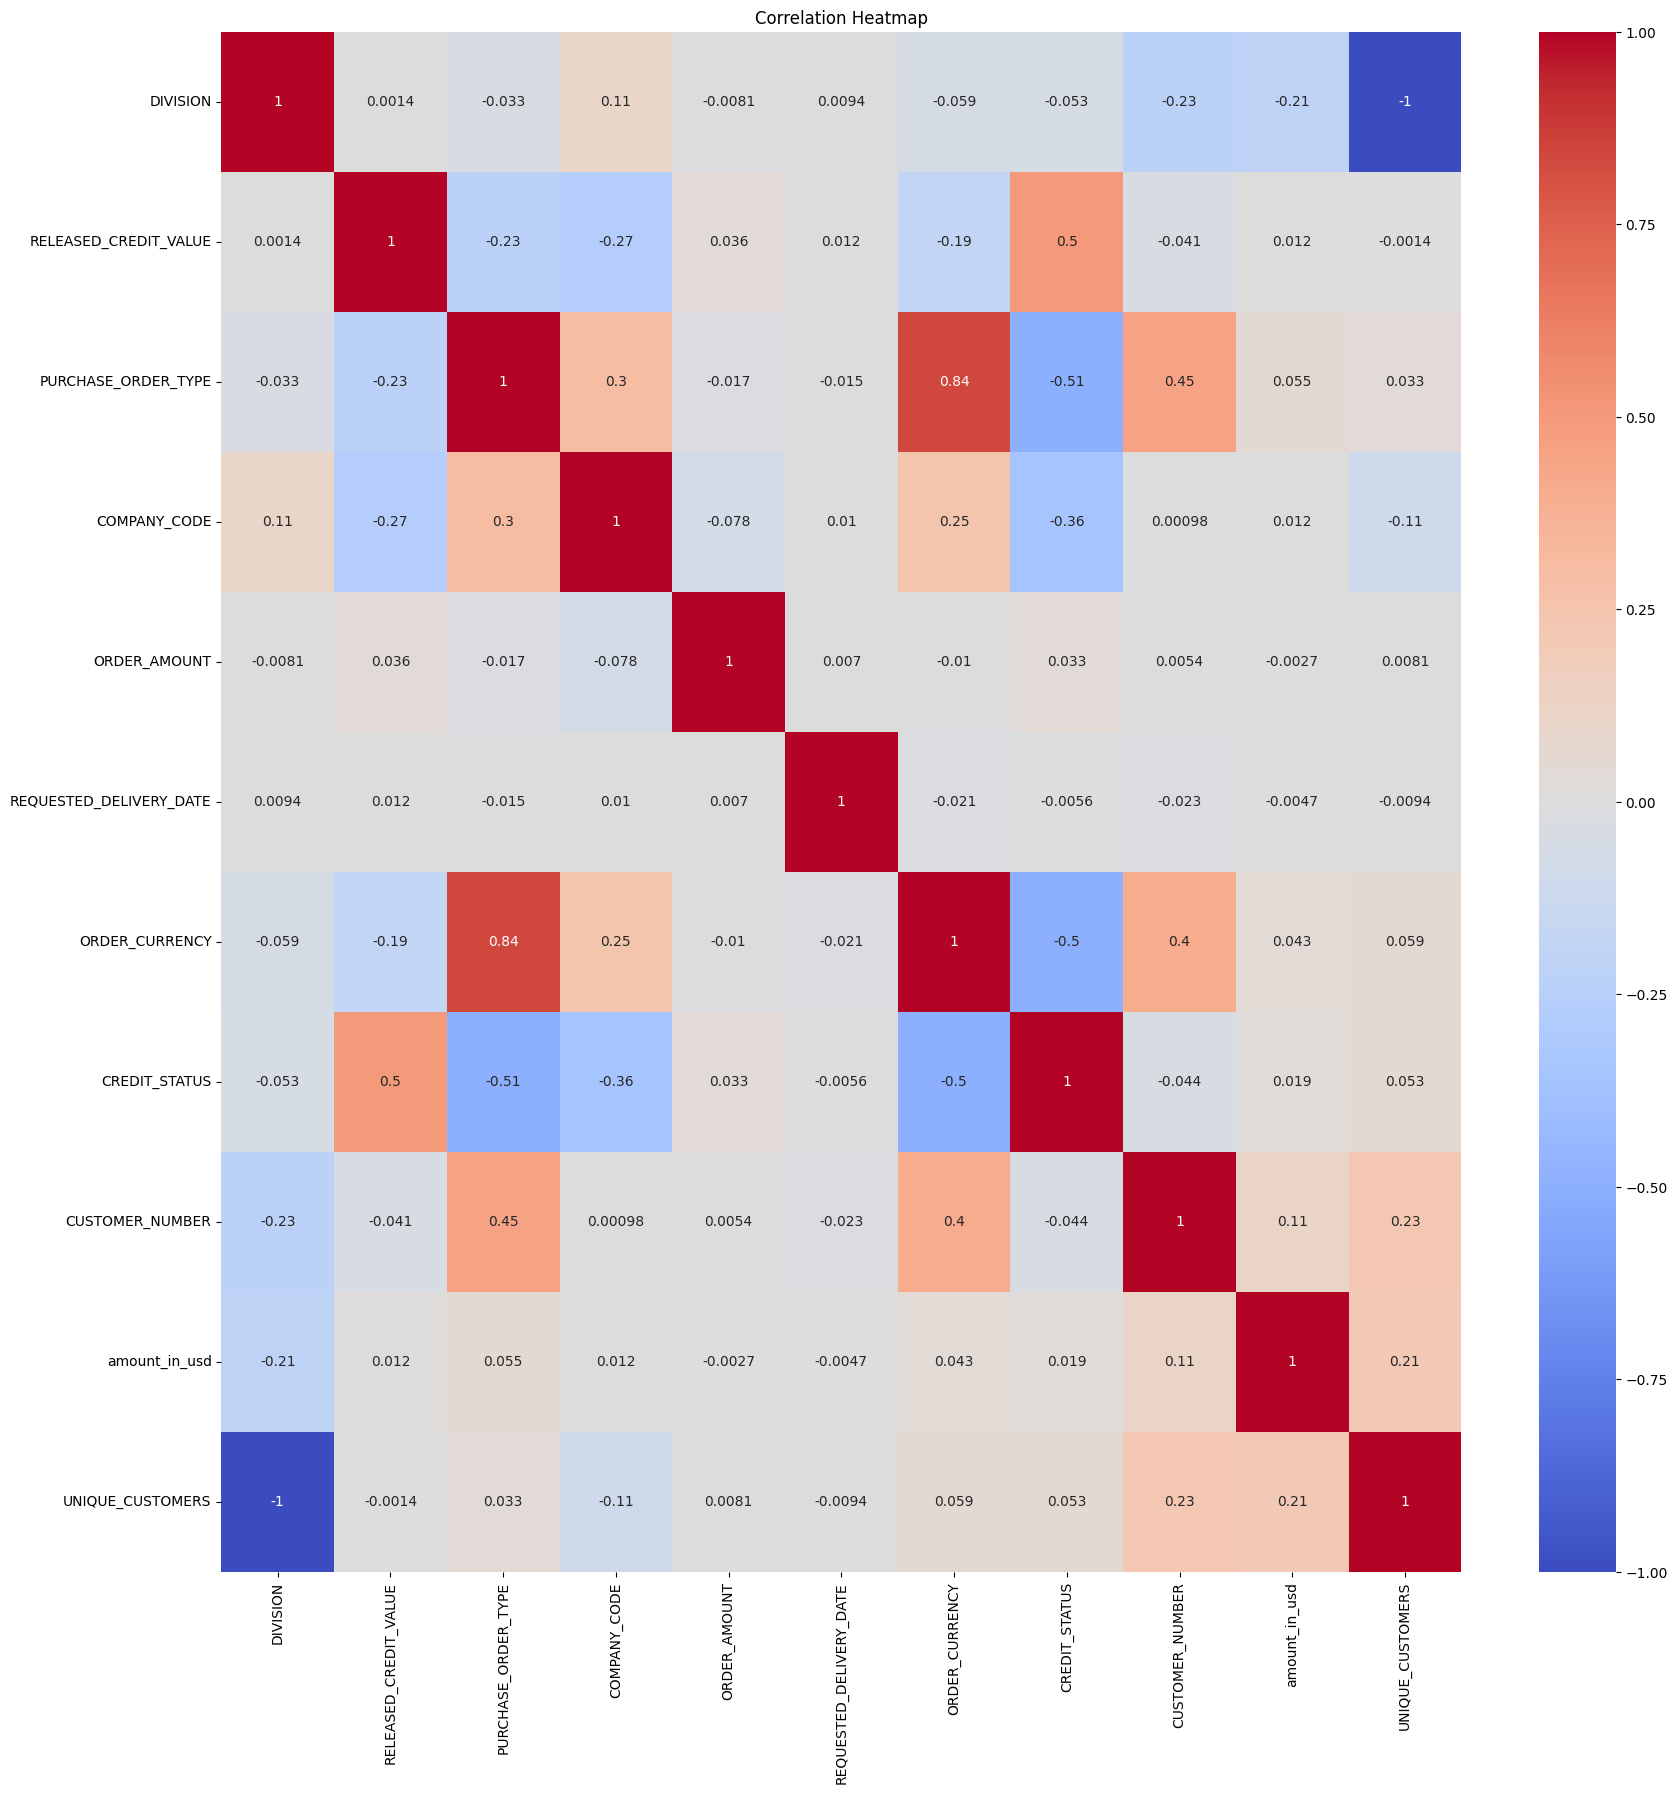

In [88]:
correlation_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [89]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Initialize the regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'XGBoost': XGBRegressor()
}

# Train and evaluate the models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {'MSE': mse, 'RMSE': rmse, 'R-Squared': r2}

# Compare the accuracies of the models
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"MSE: {metrics['MSE']}")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"R-Squared: {metrics['R-Squared']}")
    print()


Linear Regression:
MSE: 195918.62763956393
RMSE: 442.6269621696852
R-Squared: 0.05263118333300554

Decision Tree:
MSE: 98.95925121099323
RMSE: 9.94782645661821
R-Squared: 0.999521480372502

Random Forest:
MSE: 69.55743849846904
RMSE: 8.340110221002421
R-Squared: 0.999663653482088

AdaBoost:
MSE: 49861.72569851891
RMSE: 223.29739295056473
R-Squared: 0.7588925328790892

XGBoost:
MSE: 165.90499038913012
RMSE: 12.880411111029419
R-Squared: 0.9991977627838775



In [ ]:

# Select the best model based on the evaluation metrics
best_model = min(results, key=lambda x: results[x]['R-Squared'])
print(f"Best Model: {best_model}")

# Perform Hyperparameter tuning and select the best hyperparameters

# Example for RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, None]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Model:", best_model)
print("Best Parameters:", best_params)

# Calculate the best model accuracy
y_pred = best_model.predict(X_test)
best_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Best Model RMSE:", best_rmse)
